In [16]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline 

In [20]:
# load normalized data and true labels
scaled_data = pd.read_csv('../data/scaled_top_100.csv', index_col=0)
labels = pd.read_csv('../data/labels_top_100.csv',index_col=0)

# encode categorical labels to numerical codes
labels = labels['Response'].values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print("Label Map:")
for encoded_value, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_value}: {original_label}")

Label Map:
0: N
1: R


In [21]:
# fit PCA to data
pca = PCA(n_components=15)
pca.fit_transform(scaled_data)

array([[ 3.55474006e+00, -4.41982964e-01,  1.11430046e-01,
        -2.19205554e+00,  1.43632113e+00, -9.19686227e-01,
        -3.07716488e-01, -2.51806388e+00, -1.25567034e+00,
         4.50064113e-02,  4.94077378e-01,  1.43361226e+00,
         1.59021178e+00,  2.16314813e+00,  2.15890296e+00],
       [ 1.90387541e+00, -2.49802444e+00,  1.44704779e+00,
        -5.17033795e+00, -4.09653399e-01, -2.82431841e-01,
        -1.12567319e+00,  2.68622477e-01, -8.18979954e-01,
         1.75891815e+00,  1.54988032e-01, -3.76367485e-01,
        -1.13459984e+00,  4.22141197e-01, -7.28155407e-01],
       [-1.13101463e+01, -8.69481852e-01,  2.94316700e+00,
         1.30766912e+00, -1.78628016e+00,  1.69652531e-01,
        -2.52622502e-01,  1.22529648e+00,  7.27757721e-01,
         3.85813927e-01,  1.01814245e+00, -2.58872536e+00,
        -8.11816926e-01, -9.25744465e-01, -6.19544481e-02],
       [ 3.94551785e+00, -3.50135982e+00, -1.41767818e+00,
        -2.08851240e+00, -5.14525556e-01, -7.57852036

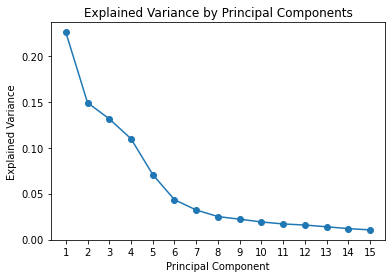

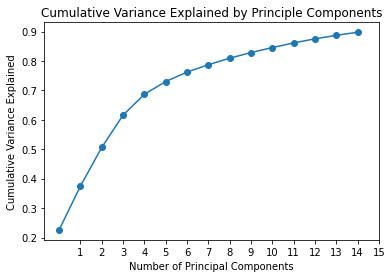

In [22]:
# use elbow method on variance explained to select optimal number of principal components
explained_variance = pca.explained_variance_ratio_

# plot explained variance against principal component
plt.plot(range(1, len(explained_variance) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# also check cumulative variance explained
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Variance Explained by Principle Components')
plt.xlabel('Number of Principal Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.ylabel('Cumulative Variance Explained') ;

In [23]:
# 2 principal components seems to be optimal
pca2 = PCA(n_components=2)
PCAreduced_data = pca2.fit_transform(scaled_data)

In [24]:
# Get the loadings (coefficients) for the first two principal components
loadings = pca2.components_[:2]
# Get the absolute values of the loadings
abs_loadings = np.abs(loadings)
# Find the indices of top features for each principal component in descending order
top_features_indices = np.argsort(abs_loadings, axis=1)[:, ::-1]
# Make the column headers in scaled_data as a list
genes = list(scaled_data.columns)
print(genes)
# Get the names of features corresponding to the top indices
top_features = [genes[idx] for idx in top_features_indices.flatten()]
print(top_features)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
['38', '79', '92', '58', '42', '84', '23', '93', '97', '73', '28', '3', '41', '91', '45', '53', '68', '64', '76', '60', '83', '87', '34', '61', '74', '57', '63', '27', '88', '56', '70', '90', '44', '47', '99', '51', '32', '75', '54', '72', '86', '59', '39', '62', '43', '37', '50', '35', '71', '46', '26', '96', '10', '49', '89', '25', '82', '0', '40', '19', '95', '22', '78', '98', '21', '29', '24', '65', '1

In [25]:
# To find the gene names of the top contributing genes of the PCA
log_2_data = pd.read_csv('../data/log2_top_100.csv')
Gene1 = log_2_data.columns[63]
print('Gene1:', Gene1)
Gene2 = log_2_data.columns[8]
print('Gene2:',Gene2)

Gene1: FABP3
Gene2: IGKC


No handles with labels found to put in legend.


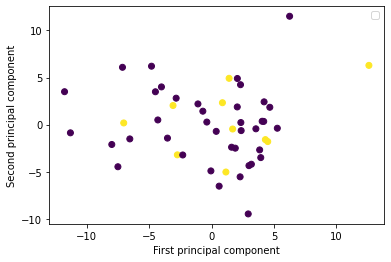

In [26]:
plt.scatter(PCAreduced_data[:, 0], PCAreduced_data[:, 1], c=labels_encoded)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()

In [27]:
# Train a logistic regression model using the top 2 PCAs
logreg = sklearn.linear_model.LogisticRegression()
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(PCAreduced_data)
PCAreduced_data = scaler.transform(PCAreduced_data)
logreg.fit(PCAreduced_data,labels_encoded)
y_pred = logreg.predict(PCAreduced_data)
acc = accuracy_score(labels_encoded, y_pred)
print("Accuracy score of LogReg model on top 2 PCAs:", acc)

Accuracy score of LogReg model on top 2 PCAs: 0.7959183673469388


In [28]:
# Train a logistic regression model using the top 2 PCAs before optimizing hyperparameters
X_train, X_test, y_train, y_test = train_test_split(PCAreduced_data, labels_encoded, test_size = 0.3, random_state=1210)
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
y_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)
print("Training accuracy before hyperparameter optimization:", training_accuracy)
print("Test set accuracy before hyperparameter optimization:", test_accuracy)

Training accuracy before hyperparameter optimization: 0.7941176470588235
Test set accuracy before hyperparameter optimization: 0.8


In [29]:
# Train a logistic regression model using the top 2 PCAs
logreg = sklearn.linear_model.LogisticRegression(penalty="l1", C=0.1,solver='liblinear')

logreg.fit(PCAreduced_data,labels_encoded)
y_pred = logreg.predict(PCAreduced_data)
acc = accuracy_score(labels_encoded, y_pred)
print("Accuracy score of LogReg model on top 2 PCAs:", acc)


Accuracy score of LogReg model on top 2 PCAs: 0.7959183673469388


In [30]:
# find the best hyperparameters for an L1 regularized LogReg model
hyperparameters = {
    'C': [0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(LogisticRegression(penalty="l1"), hyperparameters,  cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 0.1, 'max_iter': 1000, 'solver': 'liblinear'}


In [33]:
# Train a logistic regression model using the top 2 PCAs after optimizing hyperparameters
y_pred = best_model.predict(X_train)
training_accuracy = accuracy_score(y_pred, y_train)
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_pred, y_test)

print("Training accuracy after hyperparameter optimization:", training_accuracy)
print("Test set accuracy after hyperparameter optimization:", test_accuracy)

Training accuracy after hyperparameter optimization: 0.7941176470588235
Test set accuracy after hyperparameter optimization: 0.8


In [32]:
# cv of PCA (number of PCs) and L1 logistic regression

pipeline = Pipeline([
    ('pca', PCA()),
    ('clf', LogisticRegression(penalty = 'l1'))

])

hyperparameters = {
    'pca__n_components': list(range(1, 16)),
    'clf__C': [0.1, 1, 10, 100, 1000],
    'clf__solver': ['liblinear', 'saga'],
    'clf__max_iter': [1000]
}

grid_search = GridSearchCV(pipeline, hyperparameters,  cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

Best hyperparameters: {'clf__C': 0.1, 'clf__max_iter': 1000, 'clf__solver': 'liblinear', 'pca__n_components': 1}


/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
650 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self